<a href="https://colab.research.google.com/github/serliputri/PCVK_Ganjil_2023/blob/main/Ser_PCVK_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


**Praktikum Konsep Feature Matching**

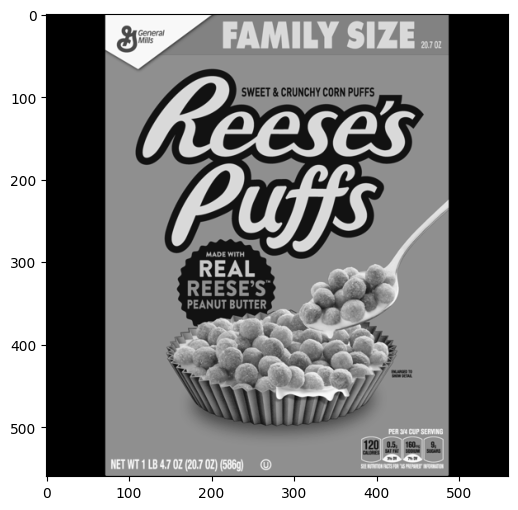

In [2]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

reeses = cv.imread('/content/drive/MyDrive/Bahan PCVK/jajan.png',0)
display(reeses)

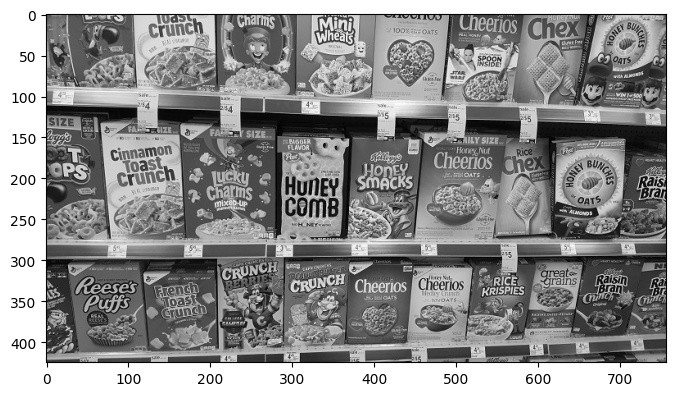

In [3]:
cereals=cv.imread('/content/drive/MyDrive/Bahan PCVK/jajan2.jpg',0)
display(cereals)

In [4]:
orb= cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [5]:
len(matches)

139

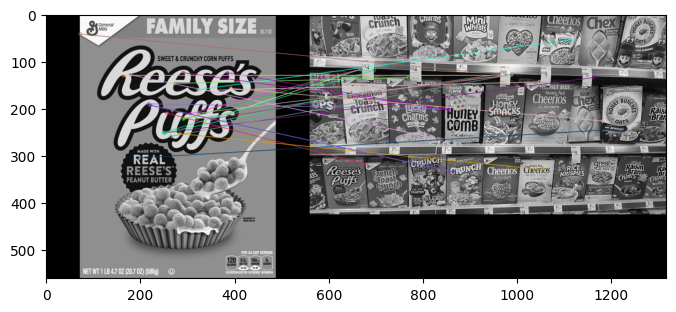

In [6]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses, kp1,cereals, kp2, matches[:25], None, flags=2)
display(reeses_match)

In [7]:
pip install opencv-contrib-python==4.8.1.78

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [8]:
sift= cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good=[]

#makin kecil jarak makin cocok
#ratio match <75% match2
for match1,match2 in matches:
  #jika jarak match1 lebih keci dari jarak 75% match2
  #descriptor disimpan
  if match1.distance <0.75*match2.distance:
    good.append([match1])

len(good)

79

In [9]:
len(matches)

1501

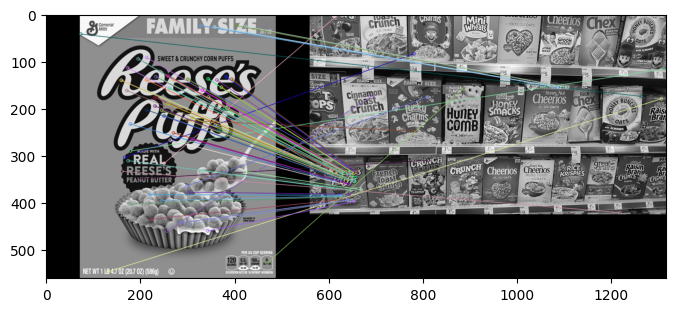

In [10]:
sift_matches = cv.drawMatchesKnn(reeses, kp1,cereals, kp2, good, None, flags=2)
display(sift_matches)

**Tugas Praktikum**

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

In [11]:
def facedet(img_asli,cascade_face):
  # Detect faces in the image
  img_facedet = img_asli.copy()
  faces = cascade_face.detectMultiScale(img_facedet, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

  # Draw rectangles around the detected faces
  for (x, y, w, h) in faces:
      cv.rectangle(img_facedet, (x, y), (x+w, y+h), (0, 255, 0), 2)


  # Display the original and processed images side by side
  fig, axs = plt.subplots(1, 2, figsize=(8, 5))
  axs[0].imshow(cv.cvtColor(img_asli, cv.COLOR_BGR2RGB))
  axs[0].set_title('Original')
  axs[1].imshow(cv.cvtColor(img_facedet, cv.COLOR_BGR2RGB))
  axs[1].set_title('Detected Faces')
  plt.show()

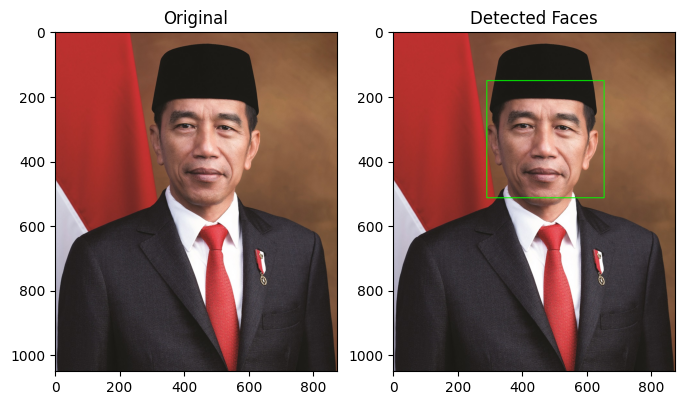

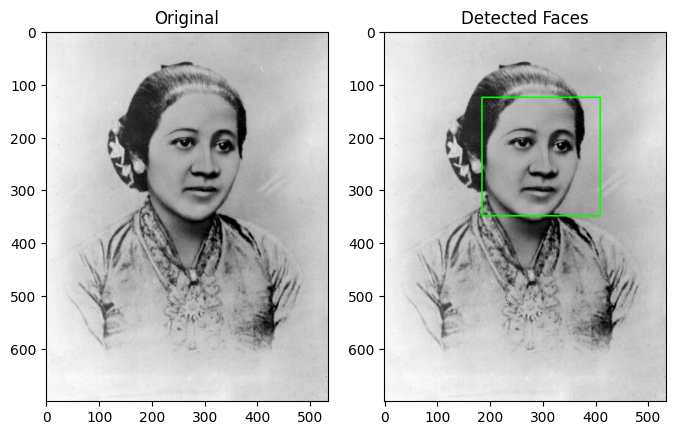

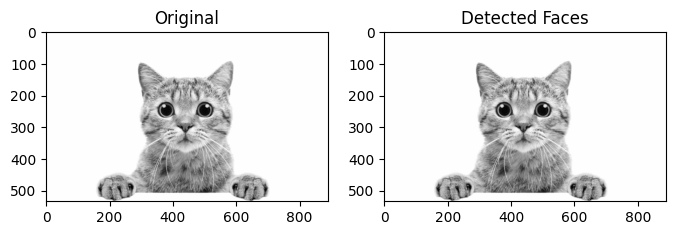

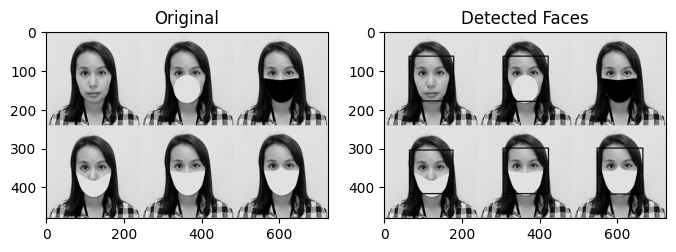

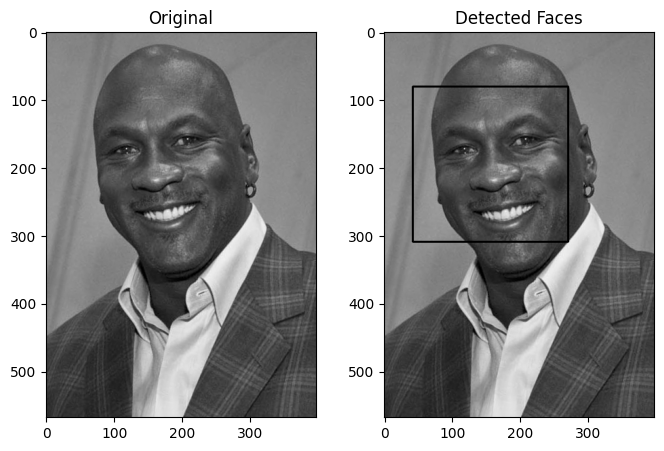

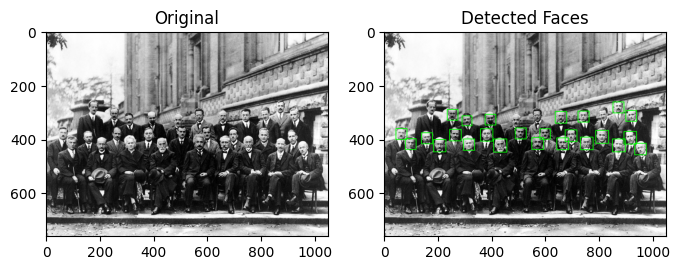

In [12]:
# Load the Haar cascade classifier for face detection
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/Bahan PCVK/haarcascade_frontalface_alt.xml')

# Load an image
img_j = cv.imread('/content/drive/MyDrive/Bahan PCVK/jokowi.jpg')
facedet(img_j, cascade_face)

# Load an image
img_k = cv.imread('/content/drive/MyDrive/Bahan PCVK/kartini.jpg')
facedet(img_k, cascade_face)

# Load an image
img_c = cv.imread('/content/drive/MyDrive/Bahan PCVK/kucing.jpg',0)
facedet(img_c, cascade_face)

# Load an image
img_m = cv.imread('/content/drive/MyDrive/Bahan PCVK/mask.png',0)
facedet(img_m, cascade_face)

# Load an image
img_mj = cv.imread('/content/drive/MyDrive/Bahan PCVK/mjordan.jpg',0)
facedet(img_mj, cascade_face)

# Load an image
img_s = cv.imread('/content/drive/MyDrive/Bahan PCVK/solvayconf.jpg')
facedet(img_s, cascade_face)

Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya

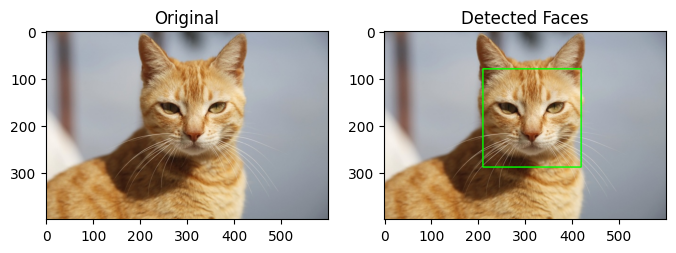

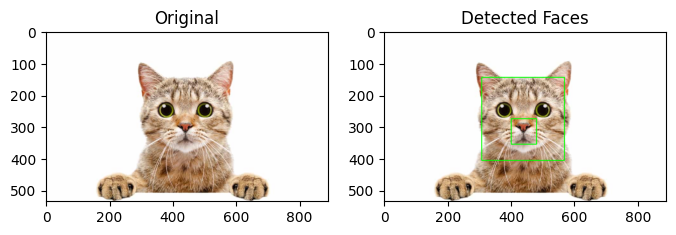

In [13]:
# Load the Haar cascade classifier for face detection
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/Bahan PCVK/haarcascade_frontalcatface.xml')

# Load an image
img_c = cv.imread('/content/drive/MyDrive/Bahan PCVK/mycat.jpg')
facedet(img_c, cascade_face)

img_k = cv.imread('/content/drive/MyDrive/Bahan PCVK/kucing.jpg')
facedet(img_k, cascade_face)

Cobakan juga untuk eyes detection

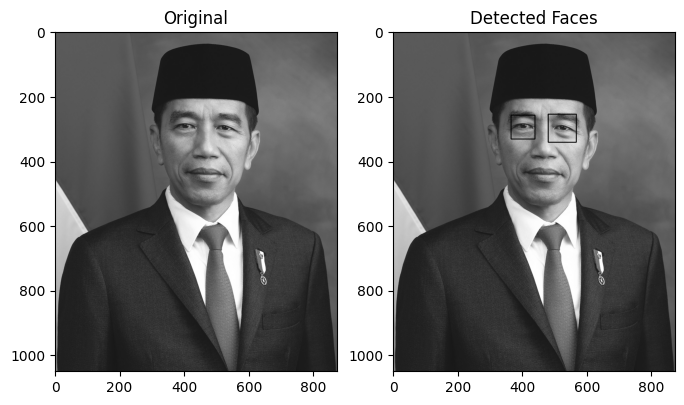

In [14]:
# Load the Haar cascade classifier for face detection
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/Bahan PCVK/haarcascade_eye.xml')

# Load an image
img_jokowi = cv.imread('/content/drive/MyDrive/Bahan PCVK/jokowi.jpg',0)
facedet(img_jokowi, cascade_face)

Lakukan Face Tracking menggunakan Google Colab

In [15]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [16]:
# Fungsi untuk mengonversi objek JavaScript menjadi gambar OpenCV
def js_to_image(js_reply):
  """
  Params:
          js_reply: Objek JavaScript yang berisi gambar dari webcam
  Returns:
          img: Gambar OpenCV dalam format BGR
  """
  # Mendecode gambar dari base64
  image_bytes = b64decode(js_reply.split(',')[1])
  # Mengonversi byte menjadi array numpy
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # Mendecode array numpy menjadi gambar OpenCV dalam format BGR
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# Fungsi untuk mengonversi gambar bounding box OpenCV menjadi string byte base64 untuk ditampilkan di aliran video
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Array Numpy (piksel) yang berisi persegi panjang untuk ditampilkan di aliran video.
  Returns:
        bytes: String byte gambar base64
  """
  # Mengonversi array menjadi gambar PIL
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # Memformat bbox menjadi format png untuk dikembalikan
  bbox_PIL.save(iobuf, format='png')
  # Memformat string pengembalian
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [17]:
# Menginisialisasi model deteksi wajah menggunakan metode Haar Cascade
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [18]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # mendapatkan data foto
  data = eval_js('takePhoto({})'.format(quality))
  # mendapatkan gambar dalam format OpenCV
  img = js_to_image(data)
  # mengubah gambar menjadi skala keabuan
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # mendapatkan koordinat kotak pembatas wajah menggunakan Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # menggambar kotak pembatas wajah pada gambar
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # menyimpan gambar
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


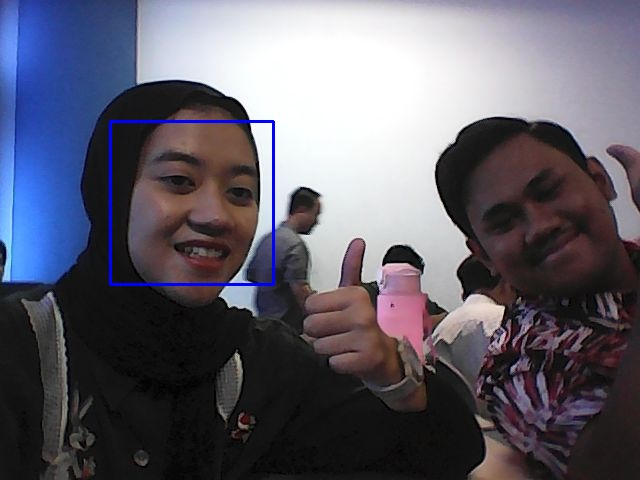

In [19]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Menampilkan gambar yang baru saja diambil.
  display(Image(filename))
except Exception as err:
  # Kesalahan akan muncul jika pengguna tidak memiliki webcam atau tidak memberikan
  # izin akses ke webcam.
  print(str(err))

In [20]:
# JavaScript untuk membuat live video stream menggunakan webcam sebagai input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

# Fungsi untuk menangani frame video
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [21]:
# Memulai streaming video dari webcam
video_stream()
# Label untuk video
label_html = 'Capturing...'
# Inisialisasi bounding box kosong
bbox = ''
count = 0
while True:
    # Mendapatkan respons dari frame video
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Mengonversi respons JavaScript menjadi gambar OpenCV
    img = js_to_image(js_reply["img"])

    # Membuat overlay transparan untuk bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # Mengonversi gambar ke skala keabuan untuk deteksi wajah
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Mendapatkan koordinat wilayah wajah
    faces = face_cascade.detectMultiScale(gray)
    # Mendapatkan kotak pembatas wajah untuk overlay
    for (x, y, w, h) in faces:
        bbox_array = cv.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Mengatur channel alpha pada overlay bbox
    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # Mengonversi overlay bbox menjadi bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # Memperbarui bbox sehingga frame berikutnya mendapatkan overlay baru
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

**Blurring pada bagian wajah yang terdeteksi**

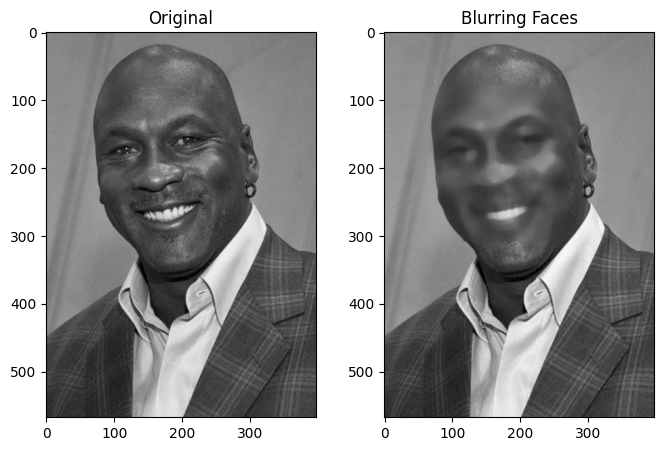

In [22]:
# Load the cascade
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/Bahan PCVK/haarcascade_frontalface_alt.xml')

# Load the images
image = cv.imread('/content/drive/MyDrive/Bahan PCVK/mjordan.jpg',0)  # Path to the input image file


def facedet(img_asli,cascade_face):
  # Detect faces in the image
  img_facedet = img_asli.copy()
  faces = cascade_face.detectMultiScale(img_facedet, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

   # Apply median blur to the detected faces
  for (x, y, w, h) in faces:
    face_roi = img_asli[y:y+h, x:x+w]
    blurred_face = cv.medianBlur(face_roi, 15)  # Adjust the kernel size as needed
    img_facedet[y:y+h, x:x+w] = blurred_face

  # Display the original and processed images side by side
  fig, axs = plt.subplots(1, 2, figsize=(8, 5))
  axs[0].imshow(cv.cvtColor(img_asli, cv.COLOR_BGR2RGB))
  axs[0].set_title('Original')
  axs[1].imshow(img_facedet, cmap='gray')
  axs[1].set_title('Blurring Faces')
  plt.show()

facedet(image, cascade_face)